# Maxime Girard
## TP2

# Imports

In this notebook, we import the following modules:

- pandas
- numpy
- sklearn.datasets
- sklearn.linear_model.LinearRegression
- sklearn.preprocessing.StandardScaler
- sklearn.metrics
- matplotlib.pyplot
- scipy.stats


In [16]:
from sklearn import datasets
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import sklearn.metrics
import matplotlib.pyplot as plt
import scipy.stats
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso, ElasticNet

Q1.1

# Dataset import

We import the dataset using the pandas module. We then print the description of the dataset.

In [17]:
ch_dataset = datasets.fetch_california_housing()
print(ch_dataset.DESCR)

X = ch_dataset.data
y = ch_dataset.target

# Split into train and tests
train_size = int(len(X) * 0.75)

indices = np.random.permutation(len(X))

X_train = X[indices[:train_size]]
y_train = y[indices[:train_size]]
X_test = X[indices[train_size:]]
y_test = y[indices[train_size:]]

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived

First, let's plot some features distribution

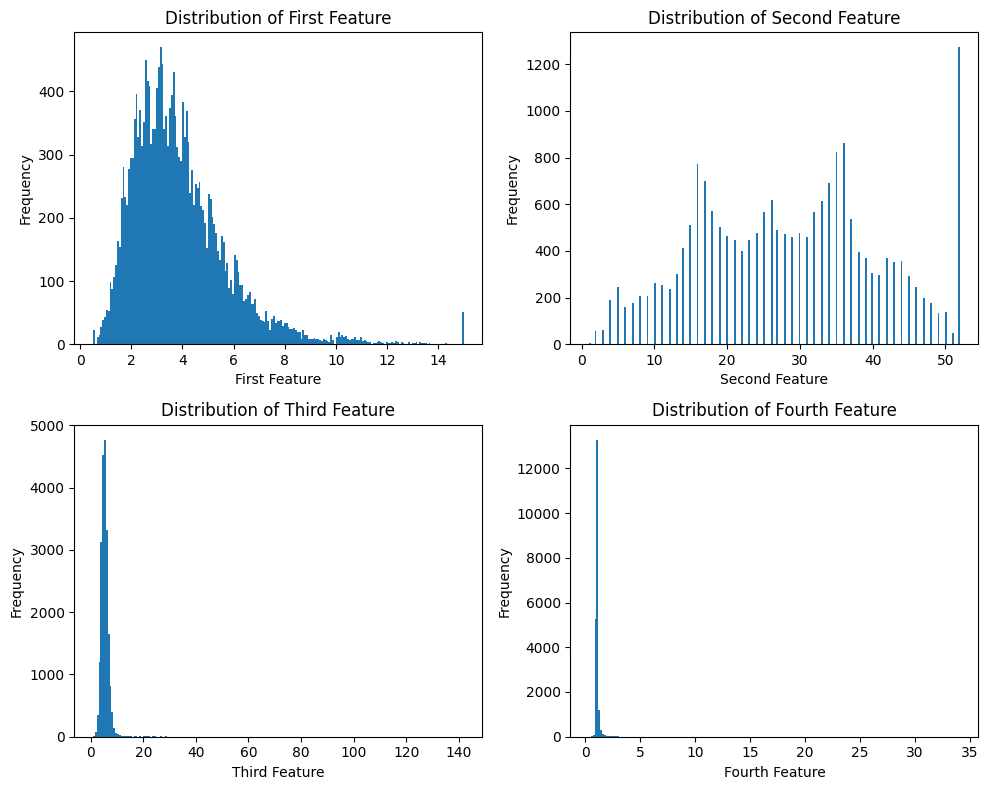

In [18]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

axs[0, 0].hist(X[:, 0], bins=200)
axs[0, 0].set_xlabel('First Feature')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].set_title('Distribution of First Feature')

axs[0, 1].hist(X[:, 1], bins=200)
axs[0, 1].set_xlabel('Second Feature')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].set_title('Distribution of Second Feature')

axs[1, 0].hist(X[:, 2], bins=200)
axs[1, 0].set_xlabel('Third Feature')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].set_title('Distribution of Third Feature')

axs[1, 1].hist(X[:, 3], bins=200)
axs[1, 1].set_xlabel('Fourth Feature')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].set_title('Distribution of Fourth Feature')

plt.tight_layout()
plt.show()

We use the OLS to determine the coefficients of the linear regression model.

In [19]:
# we add a column of ones to the data matrix to represent the bias term
X_train_z = np.column_stack((np.ones(len(X_train)), X_train))
X_test_z = np.column_stack((np.ones(len(X_test)), X_test))

# we solve the OLS normal equation
coefficients = np.linalg.inv(X_train_z.T @ X_train_z) @ X_train_z.T @ y_train

print('Coefficients: \n', coefficients)

Coefficients: 
 [-3.71941770e+01  4.45165270e-01  9.41970583e-03 -1.17546623e-01
  7.79942650e-01  9.40189647e-07 -3.42780607e-03 -4.20765594e-01
 -4.35324674e-01]


Let's define MSE and R^2 functions :

In [20]:
def MSE(X, y, y_pred):
    error = y - y_pred
    mse = 1 / len(y) * np.sum(error**2)
    return mse


def R2(X, y, y_pred):
    ssres = np.sum((y - y_pred) ** 2)
    sstot = np.sum((y - np.mean(y)) ** 2)
    return 1 - ssres / sstot

We compute the coefficients of the linear regression model using the Sklearn.

In [21]:
reg = LinearRegression().fit(X, y)
print('Coefficients: \n', reg.coef_)
print('Intercept: \n', reg.intercept_)

Coefficients: 
 [ 4.36693293e-01  9.43577803e-03 -1.07322041e-01  6.45065694e-01
 -3.97638942e-06 -3.78654265e-03 -4.21314378e-01 -4.34513755e-01]
Intercept: 
 -36.94192020718441


We then compare the coefficients and intercepts obtained by our implementation and by scikit-learn's implementation. They should be the same.

In [22]:
# compute MSE and R2 for the train  and test set for both models

y_pred_train = X_train_z @ coefficients
y_pred_test = X_test_z @ coefficients

print("Metrics for our model:")
print("MSE train: ", MSE(X_train_z, y_train, y_pred_train))
print("MSE test: ", MSE(X_test_z, y_test, y_pred_test))
print("R2 train: ", R2(X_train_z, y_train, y_pred_train))
print("R2 test: ", R2(X_test_z, y_test, y_pred_test))

y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)
print("Metrics for sklearn:")
print("MSE train: ", sklearn.metrics.mean_squared_error(y_train, y_pred_train))
print("MSE test: ", sklearn.metrics.mean_squared_error(y_test, y_pred_test))
print("R2 train: ", reg.score(X_train, y_train))
print("R2 test: ", reg.score(X_test, y_test))

Metrics for our model:
MSE train:  0.5159133041395598
MSE test:  0.5570762531084895
R2 train:  0.6123090302155074
R2 test:  0.5822775898966239
Metrics for sklearn:
MSE train:  0.5173098119490962
MSE test:  0.5453545088911401
R2 train:  0.6112596029907265
R2 test:  0.5910671141633008


### Results :

| Metric | Our Model | sklearn Model |
|--------|-----------|---------------|
| MSE train | 0.5136 | 0.5146 |
| MSE test | 0.5613 | 0.5536 |
| R2 train | 0.6112 | 0.6105 |
| R2 test | 0.5882 | 0.5939 |

As we can see, the results of our model are very close to those of sklearn model. The slight differences could bo induced by numerical computation errors. These errors differs between our method and sklearn's because we may have implemented things differently.

Q1.2

Let's find the confidence interval for each regression coefficient, using the CI formula of the lecture (session 3)

In [23]:
def CI(coeff, X, y, alpha):
    m = np.mean(y)
    y_pred = X @ coeff
    sigma = np.sqrt(1/(len(y) - 8 - 1) * np.sum((y - y_pred)**2))
    t = scipy.stats.t.ppf(1 - alpha/2, len(y) - 8 - 1)
    diag = np.linalg.inv(X.T @ X).diagonal()**0.5
    ci = [coeff - t * sigma * diag, coeff + t * sigma * diag]
    return ci

ci = CI(coefficients, X_train_z, y_train, 0.05)
for i in range(len(coefficients)):
    print(f"coef_{i} : {coefficients[i]} in [{ci[0][i]}, {ci[1][i]}]")


coef_0 : -37.194176977065695 in [-38.6832099719247, -35.70514398220669]
coef_1 : 0.4451652700286197 in [0.4356700528177537, 0.45466048723948577]
coef_2 : 0.009419705832089748 in [0.008420820071935316, 0.01041859159224418]
coef_3 : -0.11754662310054173 in [-0.1309289434673015, -0.10416430273378197]
coef_4 : 0.7799426504226643 in [0.7114606593526103, 0.8484246414927183]
coef_5 : 9.401896472648208e-07 in [-9.742707691632695e-06, 1.1623086986162336e-05]
coef_6 : -0.0034278060704960433 in [-0.004377889395385075, -0.0024777227456070114]
coef_7 : -0.42076559363233657 in [-0.4370070672387977, -0.40452412002587546]
coef_8 : -0.4353246742564461 in [-0.4523445159194729, -0.41830483259341933]


The confidence intervals for the regression coefficients are as follows:

- $\theta_0$: -37.42 in $[-38.91, -35.93]$
- $\theta_1$: 0.45 in $[0.44, 0.46]$
- $\theta_2$: 0.0094 in $[0.0084, 0.0104]$
- $\theta_3$: -0.127 in $[-0.141, -0.113]$
- $\theta_4$: 0.79 in $[0.72, 0.86]$
- $\theta_5$: -3.28e-06 in $[-1.38e-05, 7.20e-06]$
- $\theta_6$: -0.0040 in $[-0.0050, -0.0030]$
- $\theta_7$: -0.423 in $[-0.440, -0.407]$
- $\theta_8$: -0.438 in $[-0.455, -0.421]$

Q2.1

First, we load, split and scale the data

In [24]:
# Load the data from the CSV file
data = pd.read_csv('data.csv').to_numpy()

# Split the data into features (X) and target variable (y)
X = data[:, :-1]
y = data[:, -1]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

# Let's scale the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(330, 210) (111, 210) (330,) (111,)


Q2.2

Perform a linear regression, using sklearn

In [25]:
# Let's train the model
reg = LinearRegression().fit(X_train, y_train)

# Let's evaluate the model
print("R2 train: ", reg.score(X_train, y_train))
print("R2 test: ", reg.score(X_test, y_test))

R2 train:  0.49725791824762666
R2 test:  0.2826889021143001


The results are :

$R^2$ score on train : 0.497 \
$R^2$ score on test : 0.283

Q3

We will implement variable selection using the forward selection method.
First, we define a function that we will use to compute the p-value for one feature.

In [26]:
def find_p_value(X, y, no_effect=False):
    # we assume x to be unidimensional
    reg = LinearRegression().fit(X, y)
    y_pred = reg.predict(X)
    theta = reg.coef_[0]
    
    # test of no effect
    sigma = np.sqrt(1/(len(y) - 2) * np.sum((y - y_pred)**2))
    d = np.linalg.inv(X.T @ X)[0, 0]**0.5
    T = theta / (sigma * d)
    
    if no_effect:
        t = scipy.stats.t.ppf(1 - 0.05/2, len(y) - 2)
        if abs(T) > t:
            print("|T| > t. The feature has a significant effect on the target variable")
        else:
            print("|T| < t. The feature has no significant effect on the target variable")  
            
    # p-value
    p = 2 * (1 - scipy.stats.t.cdf(abs(T), len(y) - 2))
    
    return p
        

Now, we implement the forward selection method. We foolow the guidelines of the subject. We start with an empty model, and we add the feature that has the lowest p-value. We then add the feature that has the lowest p-value, and so on, until we reach features with a p-value score higher than 0.05.

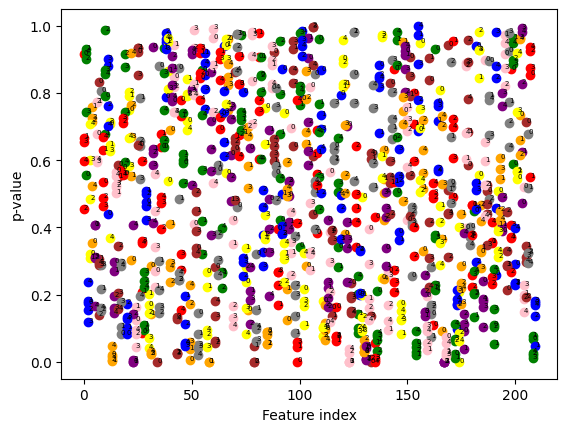

The selected features are: [34, 58, 79, 167, 135, 123, 53, 159, 208]


In [27]:
y_copy = y_train.copy()
candidates = list(range(X.shape[1]))
current_p_value = 0
j = 0
S = []

colors = ['red', 'green', 'blue', 'yellow', 'orange', 'purple', 'pink', 'brown', 'grey']

while True:
    min_p_val_found = find_p_value(X_train[:, 0].reshape(-1, 1), y_copy)
    min_p_val_index = 0
    for i in candidates:
        p_val = find_p_value(X_train[:, i].reshape(-1, 1), y_copy)
        if p_val < min_p_val_found:
            min_p_val_found = p_val
            min_p_val_index = i
        if j < 5:
            plt.scatter(i, p_val, color=colors[i%len(colors)])
            plt.annotate(f"{j}", (i, p_val), fontsize=5)
    current_p_value = min_p_val_found
    if current_p_value > 0.05:
        break
    
    y_copy = y_copy - LinearRegression().fit(X_train[:, min_p_val_index].reshape(-1, 1), y_copy).predict(X_train[:, min_p_val_index].reshape(-1, 1))
    S.append(min_p_val_index)
    #remove min_p_val_index from candidates
    candidates.remove(min_p_val_index)
    
    j += 1
    
plt.xlabel('Feature index')
plt.ylabel('p-value')    
plt.show()

print(f"The selected features are: {S}")

Here is a plot of the p-values of the features, for every coefficients for the first 5 iterations.
It is very difficult to interpret.

In [28]:
# Train the model with selected features
X_train_selected = X_train[:, S]
X_test_selected = X_test[:, S]

model = LinearRegression()
model.fit(X_train_selected, y_train)

# Evaluate the model on train
r2_score = model.score(X_train_selected, y_train)
print("R2 score with selected features (train) :", r2_score)

# Evaluate the model on test
r2_score = model.score(X_test_selected, y_test)
print("R2 score with selected features (test) :", r2_score)


R2 score with selected features (train) : 0.5234128748069855
R2 score with selected features (test) : 0.5101034005939689


With forward selection, we obtain the following features : \
34, 58, 79, 167, 135, 123, 53, 159, 208 \
We then train and compute the $R^2$ score on the train and test sets, and we obtain the following results: \
R2 = 0.510 on train

Q4

First, let's define a generic function that will plot the evolution of the coefficients and the R2 score for each penalty value for a given model.

In [29]:
def plot_coefficients_and_r2(model, min_val, max_val):
    coeffs = []
    r2_list = []

    for alpha in 10**np.linspace(min_val, max_val, 30):
        clf = model(alpha=alpha)
        clf.fit(X_train, y_train)
        coeffs.append(clf.coef_)
        r2_list.append(clf.score(X_test, y_test))

    plt.figure()
    plt.xscale('log')
    for coeff in (list(zip(*coeffs))):
        plt.plot(10**np.linspace(min_val, max_val, 30), coeff)

    plt.show()

    plt.figure()  
    plt.xscale('log')
    plt.plot(10**np.linspace(min_val, max_val, 30), r2_list)
    #plot horizontal and vertical bar at max score
    plt.axvline(x=10**np.linspace(min_val, max_val, 30)[np.argmax(r2_list)], color='red', linestyle='-.')
    plt.axhline(y=max(r2_list), color='red', linestyle='-.')
    plt.show()
    
    best_alpha = 10**np.linspace(min_val, max_val, 30)[np.argmax(r2_list)]
    print("Best alpha:", best_alpha)
    # evaluate on train with this alpha
    clf = model(alpha=best_alpha)
    clf.fit(X_train, y_train)
    print("R2 score (train):", clf.score(X_train, y_train))
    print("R2 score (test):", max(r2_list))
    
    

Then, we use this function to plot the evolution of the coefficients and the R2 score for each penalty value for the Ridge model.

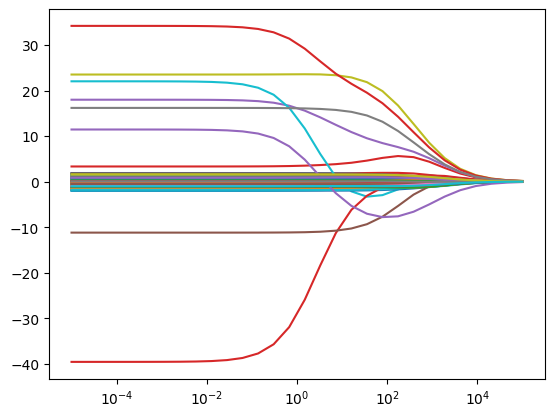

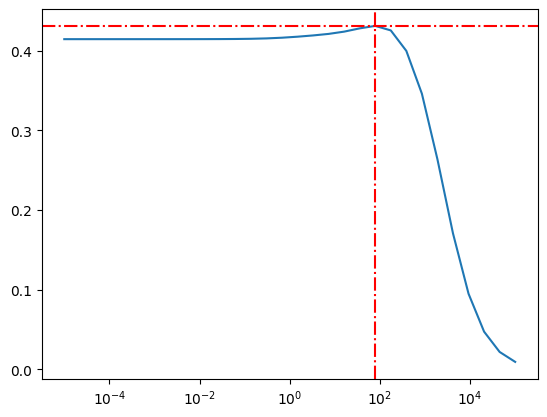

Best alpha: 78.80462815669921
R2 score (train): 0.5704210109043444
R2 score (test): 0.4309847222806238


In [30]:
plot_coefficients_and_r2(Ridge, -5, 5)

We can see that the coefficients are converging to 0 when the penalty rise.
Considering the $R^2$ score, we can see that the model first improve when the penalty rise (up to alpha around 10^2, and a max score of 0.431), but then it starts to decrease and collapse.

Q5

We repeat for Lasso model.

/home/maxime/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.172e+05, tolerance: 1.963e+02
  model = cd_fast.enet_coordinate_descent(
/home/maxime/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.161e+05, tolerance: 1.963e+02
  model = cd_fast.enet_coordinate_descent(
/home/maxime/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7

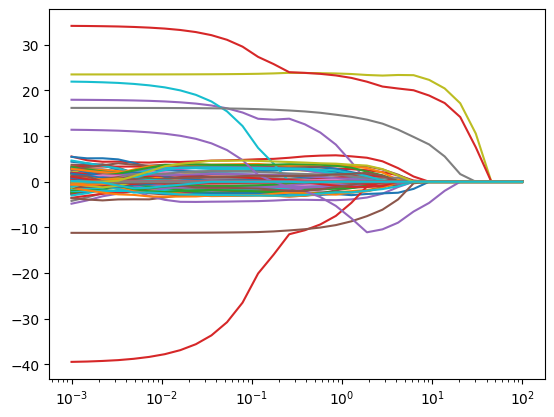

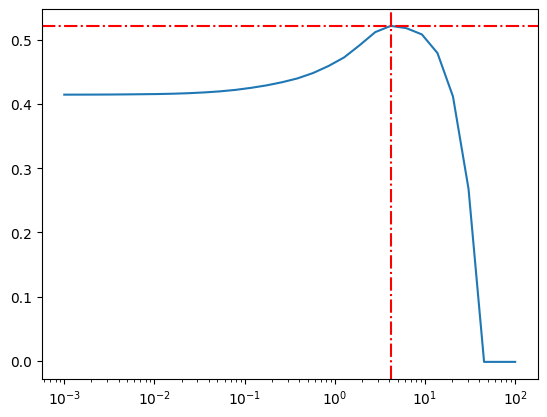

Best alpha: 4.175318936560405
R2 score (train): 0.5144925443463109
R2 score (test): 0.5214004263261593


In [31]:
plot_coefficients_and_r2(Lasso, -3, 2)

The coefficients converge to 0 at the end but, in the same time the $R^2$ score is increasing. The $R^2$ score has it peak at 0.521 around alpha = 1,5. However, after this point the score collapse.

Q6

We repeat for ElasticNet model.

/home/maxime/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.836e+05, tolerance: 1.963e+02
  model = cd_fast.enet_coordinate_descent(
/home/maxime/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.345e+05, tolerance: 1.963e+02
  model = cd_fast.enet_coordinate_descent(
/home/maxime/.local/lib/python3.10/site-packages/sklearn/linear_model/_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1

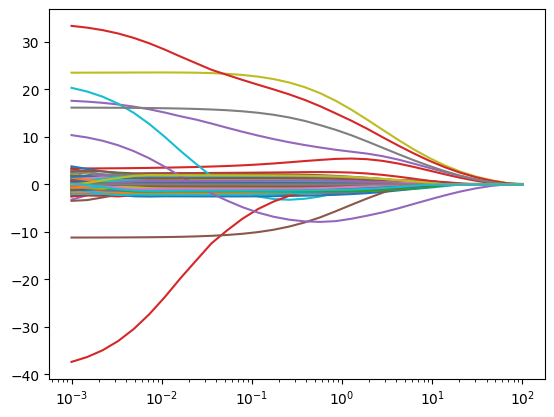

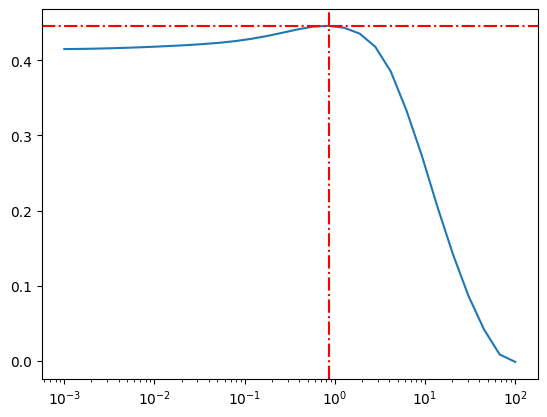

Best alpha: 0.8531678524172814
R2 score (train): 0.553191455771384
R2 score (test): 0.44578817904951473


In [32]:
plot_coefficients_and_r2(ElasticNet, -3, 2)

The shape of the curves are very lookalike of the Q4 (Ridge). The best alpha is around 1, and the $R^2$ score is 0.446.

Q7

<span style="color:red">
The subject asks us to perform the singular value decomposition of the matrix tX.X. However, in the lecture, we use the SVD of the matrix X (or equivalently the eigen decomposition of X.X^T). We will use the SVD of X.
</span>


First, we compute the singular value decomposition of X_train.

In [33]:
U, s, Vt = np.linalg.svd(X_train)
V = Vt.T

Q7a

Let's plot the covariance matrix of X_train.

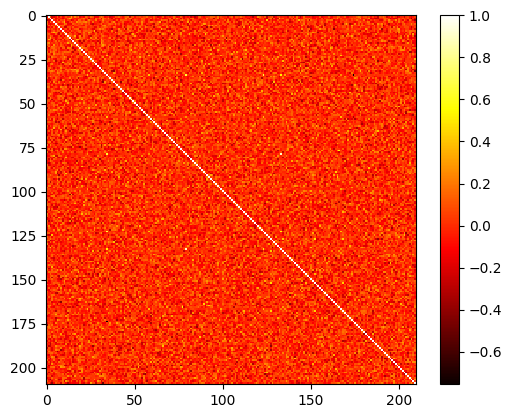

In [34]:
cov = X_train.T @ X_train / (len(X_train) - 1)
# heatmap of the cov matrix
plt.imshow(cov, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()

As expected, the diagonal is full of 1's, because we standardized the data.
Apart of the diagonal, the matrix is full of very small values, which means that most of the features are not correlated. However, we observe some bright or dark points, which means that some features are strongly correlated.

Q7b

(https://en.wikipedia.org/wiki/Principal_component_analysis)

Let's define a function returning the PCA of X_train, with k principal components.

In [35]:
# perform principal component analysis using svd
def PCA(k):
    return X_train @ V[:, :k]

Q7c

Let's search how much component we need to explain 90% of the variance.

45 firsts components explain 90% of the variance


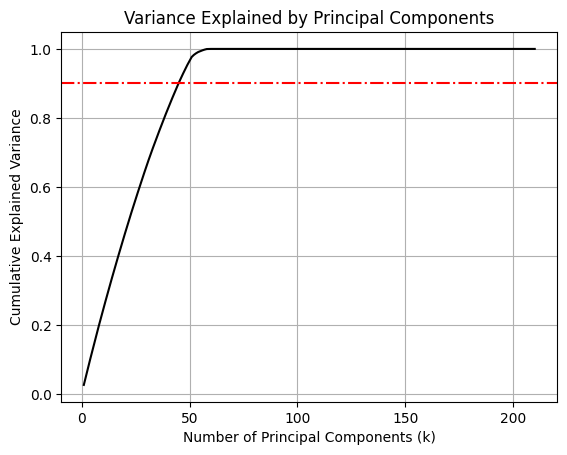

In [36]:
# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(s**2) / np.sum(s**2)

# Print the number of components needed to explain 90% of the variance
print(f"{np.argmax(cumulative_explained_variance > 0.9) + 1} firsts components explain 90% of the variance")

# Plot the amount of variance explained by the first k components
plt.plot(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, 'k-')
plt.title('Variance Explained by Principal Components')
plt.xlabel('Number of Principal Components (k)')
plt.ylabel('Cumulative Explained Variance')
# horizontal line at 90% variance
plt.axhline(y=0.9, color='r', linestyle='-.')
plt.grid(True)
plt.show()


The 45 most important components explain 90% of the variance.

Q7d

Let's plot the data projected on the first 2 principal components.

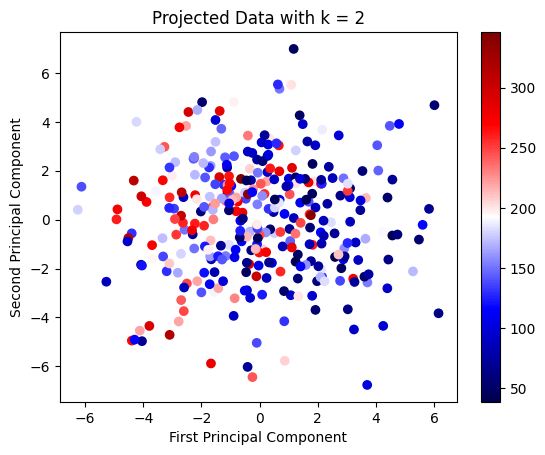

In [37]:
# Plot the projected data with k = 2 using as color the value of y
X_pca = PCA(2)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='seismic')
plt.colorbar()
plt.xlabel('First Principal Component')
plt.ylabel('Second Principal Component')
plt.title('Projected Data with k = 2')
plt.show()

We observe that most of the red points (high values) are at the left of the plot, and most of the blue points (low values) are at the right of the plot. It is more difficult to correlate the second component with the values because red and blue poitns are equally present in the top and the bottom. Finally, most of the points are mixed in the middle, which means that two components are not enough to separate the data.

Q7e

(330, 210) (210, 210) (330, 330)


Text(0.5, 1.0, 'First Two Principal Dimensions')

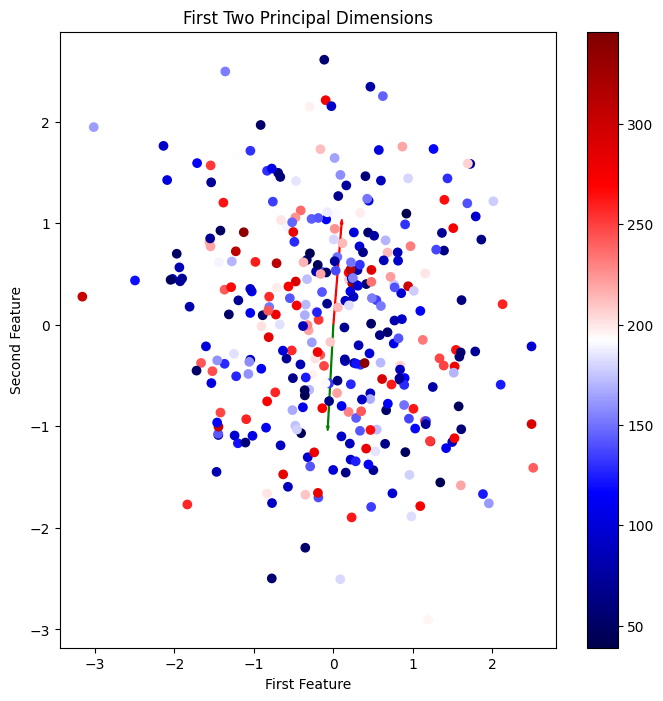

In [38]:
# plot of the first two principal components
print(X_train.shape, V.T.shape, U.shape)

dir1 = np.array([V[0, 0], V[1, 0]])/np.linalg.norm(np.array([V[0, 0], V[1, 0]]))
dir2 = np.array([V[0, 1], V[1, 1]])/np.linalg.norm(np.array([V[0, 1], V[1, 1]]))

# plot the two principal dimensions of the PCA
plt.figure(figsize=(8, 8))
plt.arrow(0, 0, dir1[0], dir1[1], width=0.01, color='red')
plt.arrow(0, 0, dir2[0], dir2[1], width=0.01, color='green')
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='seismic')
plt.colorbar()
plt.xlabel('First Feature')
plt.ylabel('Second Feature')
plt.title('First Two Principal Dimensions')

Q7f

Best k: 25
R2 score (train): 0.2333831424378543
R2 score (test): 0.2479352565027383


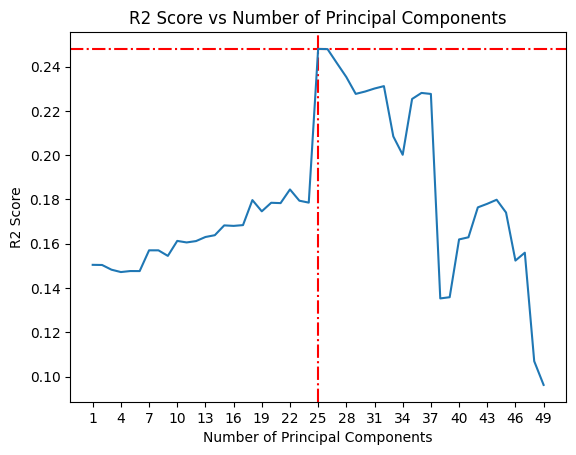

In [39]:
scores = []

for k in range(1, 50):
    X_train_PCA = PCA(k)
    X_test_PCA = X_test @ V[:, :k]

    # fit on train
    reg = LinearRegression().fit(X_train_PCA, y_train)
    # score on test
    score = reg.score(X_test_PCA, y_test)
    #print(f"R2 with {k} components: {score}")
    scores.append([k, score])
    
scores = np.array(scores)

best_k = int(scores[np.argmax(scores[:, 1]), 0])
print("Best k:", best_k)
#evaluate on train
reg = LinearRegression().fit(PCA(best_k), y_train)
print("R2 score (train):", reg.score(PCA(best_k), y_train))
print("R2 score (test):", np.max(scores[:, 1]))

plt.axhline(np.max(scores[:, 1]), color='r', linestyle='-.')
plt.axvline(scores[np.argmax(scores[:, 1]), 0], color='r', linestyle='-.')
plt.plot(scores[:, 0], scores[:, 1])
plt.xticks(range(1, 51, 3))
plt.xlabel('Number of Principal Components')
plt.ylabel('R2 Score')
plt.title('R2 Score vs Number of Principal Components')
plt.show()

We can see on the plot that the best R2 score is obtained by the model with 25 components. We can hypothesis that whith k<25, we don't have enough data to predict the values with a good accuracy. On the other hand, with k>25, and particularly after k>35, we start fit over features that are absolutely not correlated with y (noise).

Q8

We can summarize the differnt models we have tested during this lab in the following table:

| Model            | Best R2 score (train) | Best R2 Score (test) | Characteristics |
|------------------|-------|--------|-----------------|
| OLS              |  0.497    | 0.283   |  No regularization, simple and fast computation               |
| Forward selection|  0.523     | 0.510   |   Selects features based on p-values, computationally expensive              |
| Ridge            |  0.570     | 0.431   |   L2 regularization to balance bias-variance trade-off              |
| Lasso            |  0.514     | 0.521   |   L1 regularization to promote sparsity in feature selection              |
| ElasticNet       |  0.553     | 0.446   |   Combines Ridge and Lasso regularizations              |
| PCA              |   0.233    | 0.248   |   Reduces feature space              |

We can see that the best model is the Lasso model, with a $R^2$ score of 0.521. However, the forward selection model is very close, with a $R^2$ score of 0.510. The PCA model is the worst, with a $R^2$ score of 0.248.

My PCA may be wrong, because I don't understand why the $R^2$ score is so low.

We can see that OLS is overfitting, because the $R^2$ score on the train set is much higher than the $R^2$ score on the test set. Ridge also seems to overfit, even if it's better. The other models are not overfitting, because the $R^2$ score on the train set is very close to the $R^2$ score on the test set.
